<a href="https://colab.research.google.com/github/GabrielFurnielesGarcia/deeplearning/blob/main/Ejercicio%20Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Descarga los datos de MNIST

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((-1, 28*28))
test_images = test_images.reshape((-1, 28*28))

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Comprobamos que las transformaciones se han realizado correctamente
print(train_images.shape, max(train_images[0]), min(train_images[0]))

(60000, 784) 1.0 0.0


In [4]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
split = len(train_images) - 10000

validation_images = train_images[split:]
validation_labels = train_labels[split:]

train_images = train_images[:split]
train_labels = train_labels[:split]

print(split, len(train_images), len(validation_images))

50000 50000 10000


In [5]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado

  model = keras.Sequential()

  if regularizador == 0:
    model.add(keras.layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
  elif regularizador == 1:
    model.add(keras.layers.Dense(512,
                                 activation = 'relu', 
                                 kernel_regularizer = keras.regularizers.l1(0.001), 
                                 input_shape = (28*28,)))
  elif regularizador == 2:
    model.add(keras.layers.Dense(512,
                                 activation = 'relu', 
                                 kernel_regularizer = keras.regularizers.l2(0.001), 
                                 input_shape = (28*28,)))
  elif regularizador == 3:
    model.add(keras.layers.Dense(512,
                                 activation = 'relu', 
                                 kernel_regularizer = keras.regularizers.l1_l2(0.001, 0.001), 
                                 input_shape = (28*28,)))
  elif regularizador == 4:
    model.add(keras.layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
    model.add(keras.layers.Dropout(0.5))
  else:
    print('Regularizador no valido')
    return 0

  model.add(keras.layers.Dense(10, activation = "softmax"))

  print(model.summary())
  return model

In [6]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
  return modelo

In [7]:
def entrena_modelo(modelo, batch_size = 128, epochs = 30):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  return modelo.fit(x=train_images, y=train_labels, batch_size=batch_size, epochs=epochs, validation_data= (validation_images, validation_labels))

In [8]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [9]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [10]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
network0 = compila_modelo(network0)

In [12]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 6s 7ms/step - loss: 0.2806 - accuracy: 0.9185 - val_loss: 0.1442 - val_accuracy: 0.9602
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1145 - accuracy: 0.9653 - val_loss: 0.1047 - val_accuracy: 0.9700
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0763 - accuracy: 0.9776 - val_loss: 0.0877 - val_accuracy: 0.9748
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0549 - accuracy: 0.9834 - val_loss: 0.0762 - val_accuracy: 0.9782
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0404 - accuracy: 0.9880 - val_loss: 0.0758 - val_accuracy: 0.9791
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0311 - accuracy: 0.9911 - val_loss: 0.0806 - val_accuracy: 0.9774
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9934 - val_loss: 0.0859 - val_accuracy: 0.9777
Epoch 

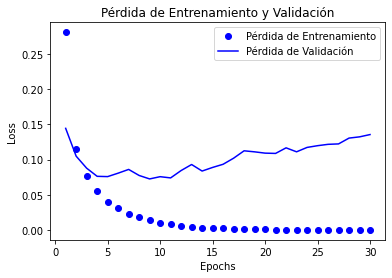

In [13]:
pinta_perdida_entrenamiento_validacion(historia0)

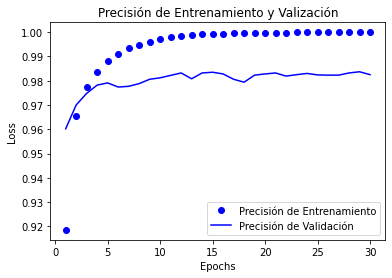

In [14]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [15]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
network1 = compila_modelo(network1)

In [17]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1527 - accuracy: 0.8447 - val_loss: 1.0109 - val_accuracy: 0.8776
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.9653 - accuracy: 0.8804 - val_loss: 0.9057 - val_accuracy: 0.8844
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8439 - accuracy: 0.8997 - val_loss: 0.7546 - val_accuracy: 0.9241
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7626 - accuracy: 0.9142 - val_loss: 0.7062 - val_accuracy: 0.9289
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7135 - accuracy: 0.9229 - val_loss: 0.6674 - val_accuracy: 0.9350
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6741 - accuracy: 0.9296 - val_loss: 0.6302 - val_accuracy: 0.9425
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6471 - accuracy: 0.9341 - val_loss: 0.6119 - val_accuracy: 0.9438
Epoch 

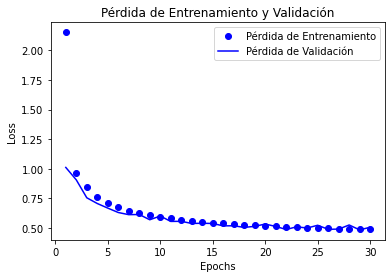

In [18]:
pinta_perdida_entrenamiento_validacion(historia1)

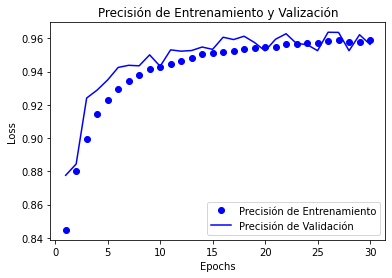

In [19]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [20]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
network2 = compila_modelo(network2)

In [22]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5279 - accuracy: 0.9127 - val_loss: 0.3012 - val_accuracy: 0.9521
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2626 - accuracy: 0.9548 - val_loss: 0.2435 - val_accuracy: 0.9562
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.2093 - accuracy: 0.9631 - val_loss: 0.2443 - val_accuracy: 0.9492
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1873 - accuracy: 0.9659 - val_loss: 0.2510 - val_accuracy: 0.9432
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1733 - accuracy: 0.9694 - val_loss: 0.2033 - val_accuracy: 0.9591
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1639 - accuracy: 0.9713 - val_loss: 0.1726 - val_accuracy: 0.9683
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1575 - accuracy: 0.9723 - val_loss: 0.1653 - val_accuracy: 0.9715
Epoch 

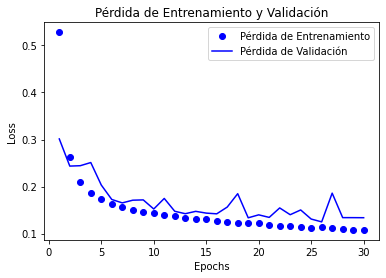

In [23]:
pinta_perdida_entrenamiento_validacion(historia2)

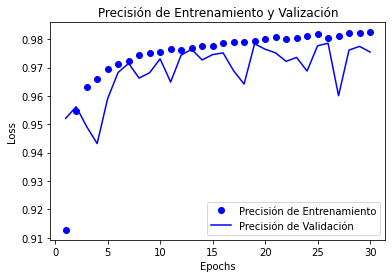

In [24]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [25]:
network3 = crea_modelo(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
network3 = compila_modelo(network3)

In [27]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1689 - accuracy: 0.8403 - val_loss: 1.0521 - val_accuracy: 0.8798
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.9895 - accuracy: 0.8772 - val_loss: 0.8559 - val_accuracy: 0.9067
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8703 - accuracy: 0.8959 - val_loss: 0.7481 - val_accuracy: 0.9316
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7903 - accuracy: 0.9106 - val_loss: 0.7596 - val_accuracy: 0.9190
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7389 - accuracy: 0.9195 - val_loss: 0.7696 - val_accuracy: 0.9123
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6983 - accuracy: 0.9270 - val_loss: 0.7088 - val_accuracy: 0.9278
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6682 - accuracy: 0.9321 - val_loss: 0.6208 - val_accuracy: 0.9445
Epoch 

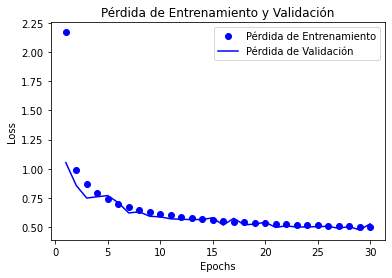

In [28]:
pinta_perdida_entrenamiento_validacion(historia3)

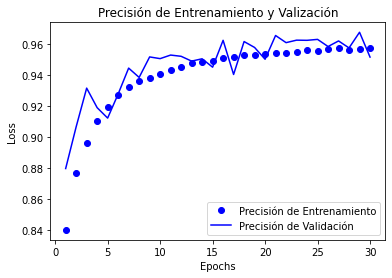

In [29]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [30]:
network4 = crea_modelo(4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
network4 = compila_modelo(network4)

In [32]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3439 - accuracy: 0.8984 - val_loss: 0.1591 - val_accuracy: 0.9563
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1654 - accuracy: 0.9504 - val_loss: 0.1129 - val_accuracy: 0.9676
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1267 - accuracy: 0.9621 - val_loss: 0.0980 - val_accuracy: 0.9717
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1058 - accuracy: 0.9684 - val_loss: 0.0857 - val_accuracy: 0.9750
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0904 - accuracy: 0.9725 - val_loss: 0.0821 - val_accuracy: 0.9763
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0804 - accuracy: 0.9757 - val_loss: 0.0818 - val_accuracy: 0.9770
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0725 - accuracy: 0.9784 - val_loss: 0.0782 - val_accuracy: 0.9783
Epoch 

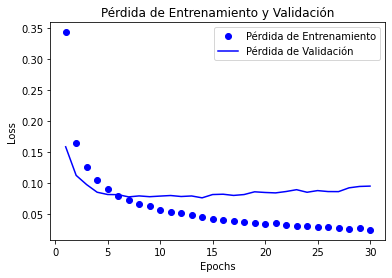

In [33]:
pinta_perdida_entrenamiento_validacion(historia4)

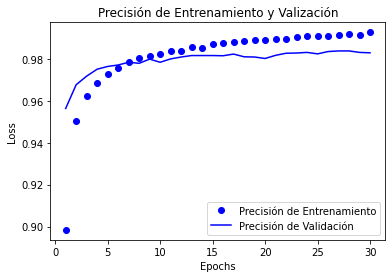

In [34]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [35]:
network5 = crea_modelo(5)

Regularizador no valido


### CONCLUSIONES

Todos los modelos consiguen una precisión superior al 96% en el conjunto de validación. SIn embargo, se observan importantes diferencias entre los valores de pérdida y la estabilidad de los modelos.

En primer lugar, los `modelos 1 y 3` (regularizador L1 y L1 + L2) generan errores considerablemente más altos con respecto a los otros modelos. Si calculamos la razón media entre los errores (tomando como referencia los modelos 3 y 4) obtenemos 0.5 / 0.09 * 100 ~ 550% de error más en los modelos 1 y 3 que en 0, 2 y 4. Por este motivo no se recomienda utilizar los modelos 1 y 3, ya que pese a generar predicciones correctas, los errores que producen son demasiado grandes en comparación con los otros modelos. 

Por otra parte, otro punto clave a tener en cuenta es la capacidad de generalización del modelo y su estabilidad.

- En el `modelo 0` (sin regularizador) se observa claramente cómo **a partir de la época 4 se produce sobreentrenamiento de la red**, pues las curvas de aprendizaje del conjunto de entrenamiento y de validación divergen a partir de este punto: el modelo reduce su error en el conjunto de entrenamiento pero lo aumenta en el de validación, mostrando así pérdida en la capacidad de generalización.

- El `modelo 2` mejora la capacidad de generalización del modelo aplicando la pérdida L2. SIn embargo, **en la curva de aprendizaje se aprecian picos que reflejan inestabilidad**. Esto no es una buena señal, pues significa que existen casos en los que nuestro modelo no funcionará correctamente y su rendimiento será más bajo. Por tanto, el valor de precisión del modelo es una falsa seguridad que en la práctica puede no verse reproducida.

- Por último, el `modelo 4` **es el que mejor resultados ha dado**, obteniendo la mayor precisión y el menor error en el conjunto de validación, lo que demuestra una buena capacidad de generalización. Además, a diferencia del modelo 2, el entrenamiento es estable. En este caso podemos inferir que el sobreentrenamiento se produce a partir de la época 7.